In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv('tinder_google_play_reviews.csv')
print(data.head())

                               reviewId         userName  \
0  9e1db3d8-56b2-4bc8-98cc-5ec279a277e1        Daniel P.   
1  814dd5b9-1777-4d72-bcfa-3681401ae2a1        Chris Wis   
2  49960353-27b7-4bb2-9d13-90949cae3027  Verity Goldface   
3  2ab51ae0-8e99-434f-8b59-bd92d5bbd5db  Bailey Hartrich   
4  91fe3349-e640-45b8-94f0-9611352f6d92   Gregg Bolinger   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a/ALm5wu...   

                                             content  score  thumbsUpCount  \
0  Full of fake accounts. Tinder isn't like it us...      1              0   
1                 Won't even start with this version      1              0   
2                                                Meh      5         

In [2]:
#On the first impressions of this dataset, I can see some null values in some columns. To analyze the Tinder reviews, we only need the content column. So let’s create a new dataset with the content column and move further:
data = data[['content']]

In [3]:
#Now let’s see if we have null values in the content column:
data = data.dropna()


In [ ]:
#Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['content'] = data['content'].apply(clean)


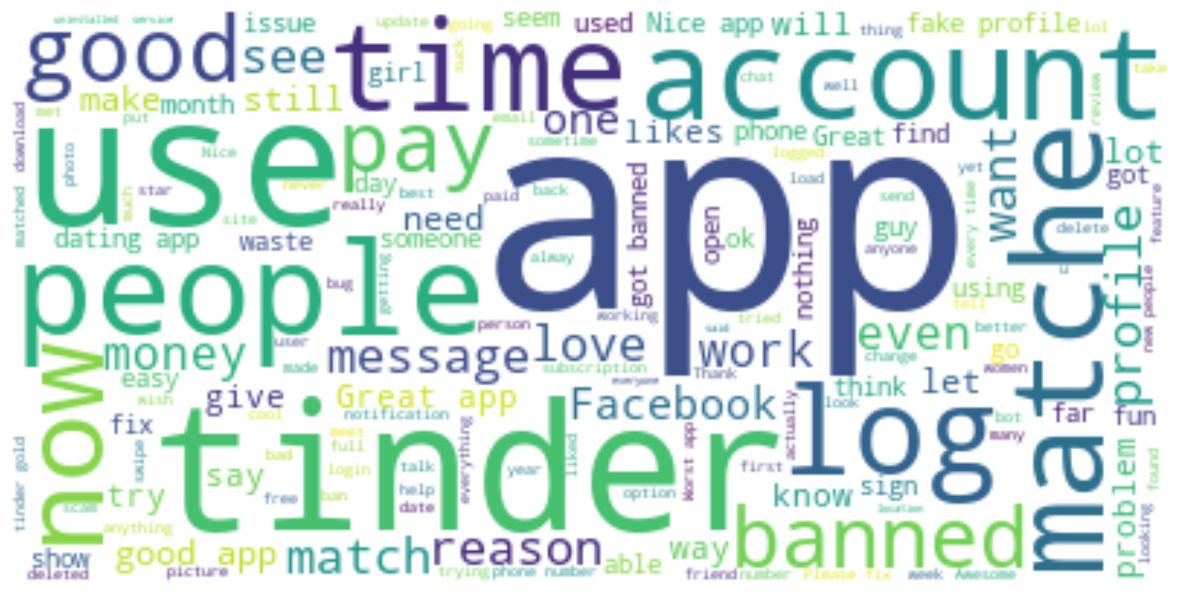

In [4]:
#Now let’s have a look at the kind of words people use in the reviews of Tinder:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color='white').generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
#Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fatih\AppData\Roaming\nltk_data...


                                             content  Positive  Negative  \
0  Full of fake accounts. Tinder isn't like it us...     0.149     0.244   
1                 Won't even start with this version     0.000     0.000   
2                                                Meh     0.000     1.000   
3  Got banned for no reason. Didn't tell me why. ...     0.139     0.357   
4  Need to be able to message someone before it i...     0.000     0.000   

   Neutral  
0    0.608  
1    1.000  
2    0.000  
3    0.504  
4    1.000  


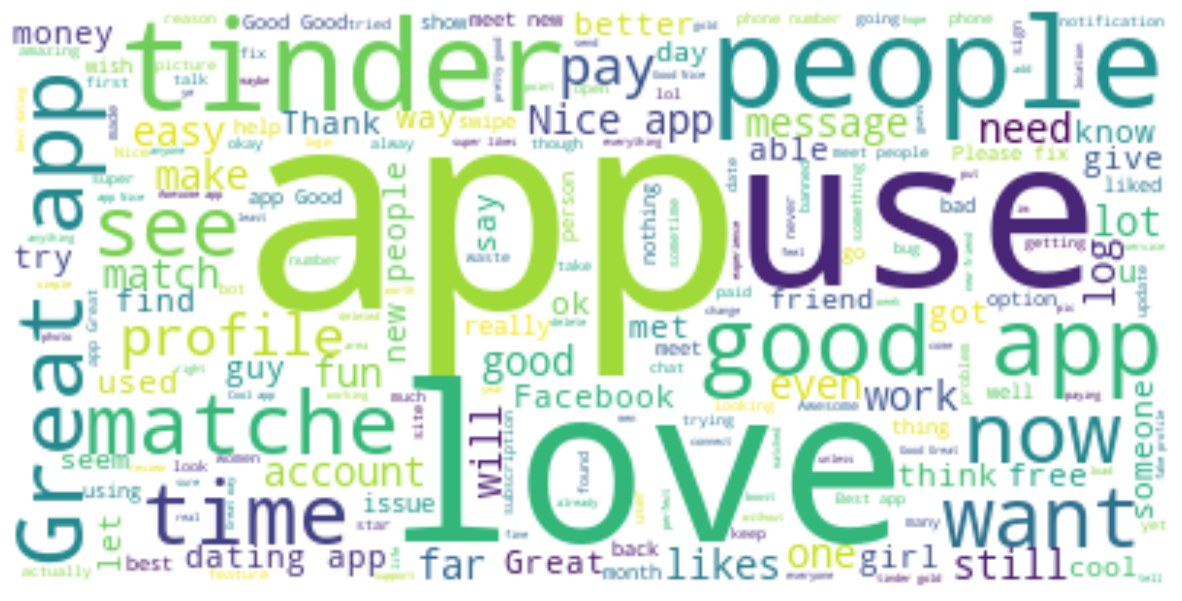

In [6]:
#Now let’s have a look at the kind of words people use in the positive reviews of Tinder:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

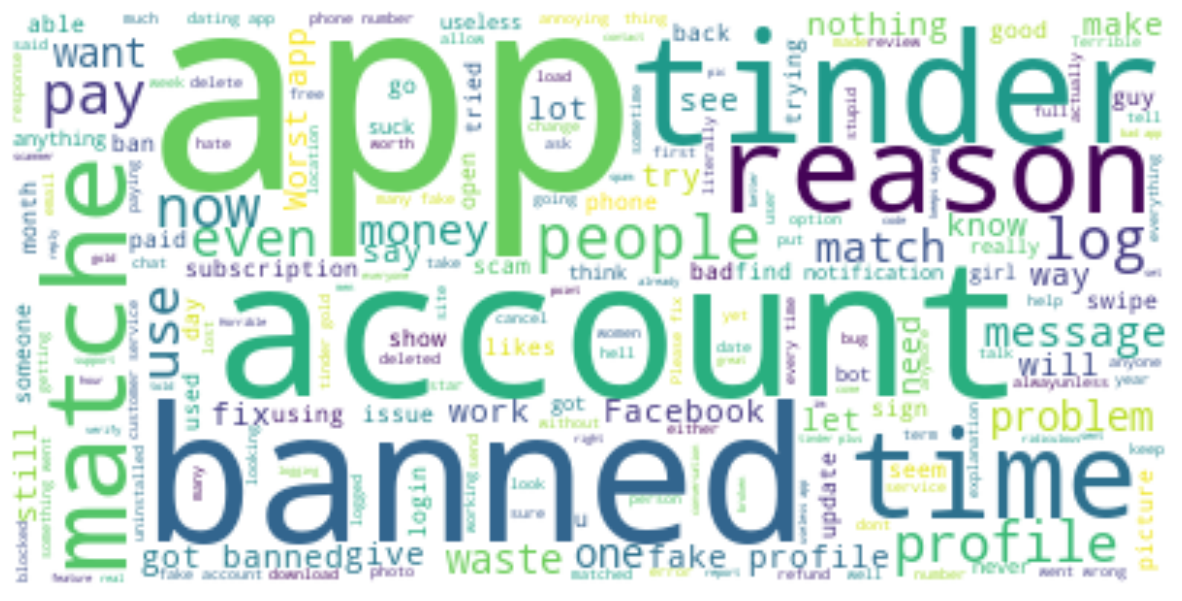

In [8]:
#Now let’s have a look at the kind of words people use in the negative reviews of Tinder:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [9]:
#Let’s have a look at the overall sentiment score of the users of Tinder:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [10]:
#So most of the users write reviews neutrally. Let’s have a look at the total of all the sentiment scores:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  154738.86600002443
Negative:  56550.85399999747
Neutral:  342638.2169999478


In [ ]:
#As you can see, the positive is much more than the negative, we can say that most users are happy with Tinder.


